# Bmad interface

[PyTao](https://bmad-sim.github.io/pytao/), based on Bmad, can be used to create an Impact-T lattice. This is a simple example of a FODO lattice in Bmad, converted to Impact-T.

In [1]:
from pytao import Tao
from impact import Impact
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Bmad lattice 

In [2]:
LAT = """
beginning[beta_a] = 10
beginning[beta_b] = 10
beginning[e_tot] = 10e6
parameter[particle] = electron
parameter[geometry] = open

d1: drift, L = 1
d2: d1
qf: quad, L = 0.1, k1 = 1
qd: qf, k1 = -1

fodo: line = (d1, qf, d2, qd)

lat: line = (2*fodo)

use, lat

"""
LATFILE = 'lat.bmad'
with open(LATFILE, 'w') as f:
    f.write(LAT)

In [3]:
tao = Tao(f'-lat {LATFILE} -noplot')
tao.cmd('set particle_start x = 1e-3')

[]

# Impact-T from Bmad 

In [4]:
I = Impact.from_tao(tao)

I.track1(x0=1e-3, pz0=10e6)

<ParticleGroup with 1 particles at 0x1296e7ee0>

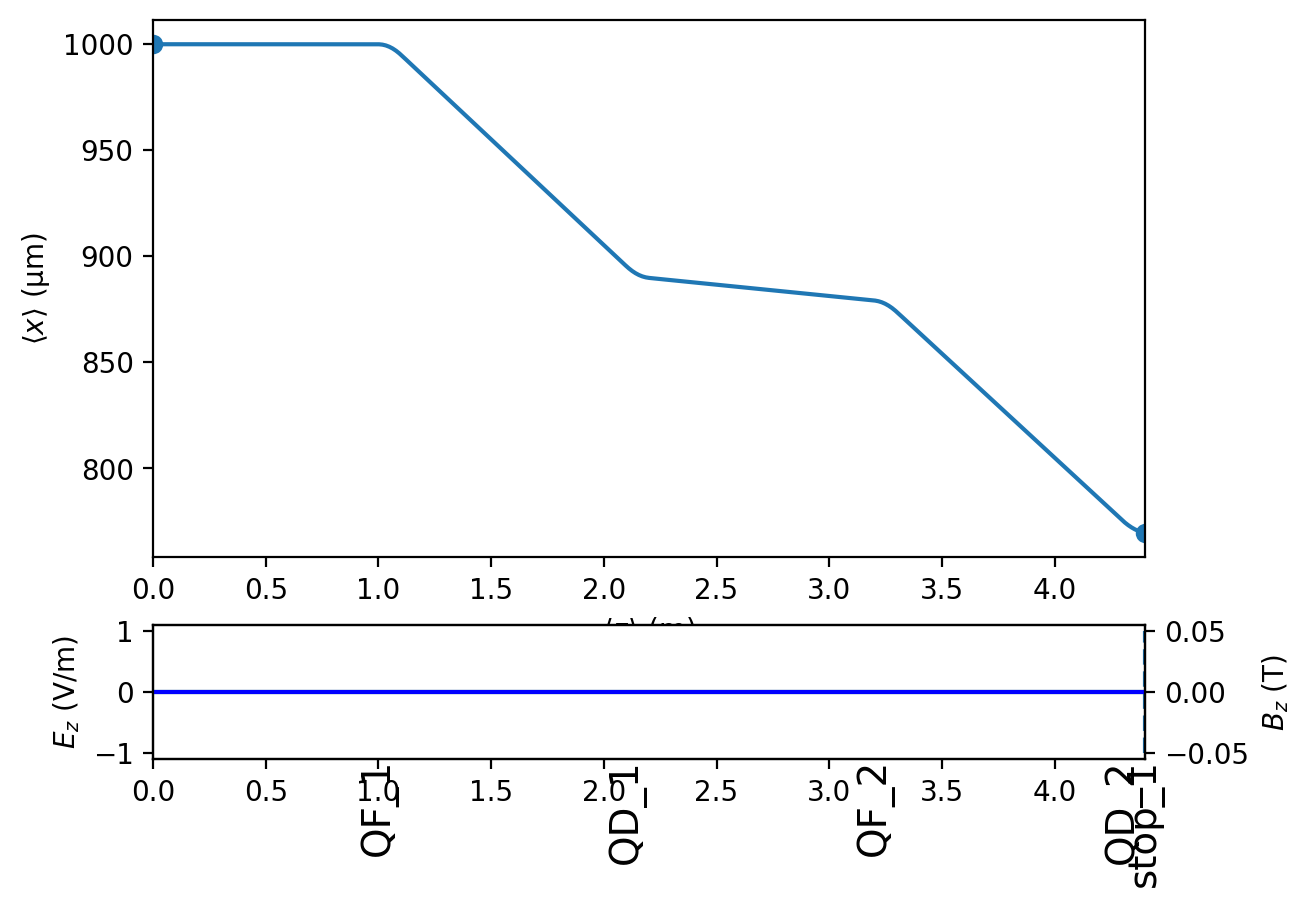

In [5]:
I.plot('mean_x', include_labels=True)

# Compare

Text(0, 0.5, '$x$ (mm)')

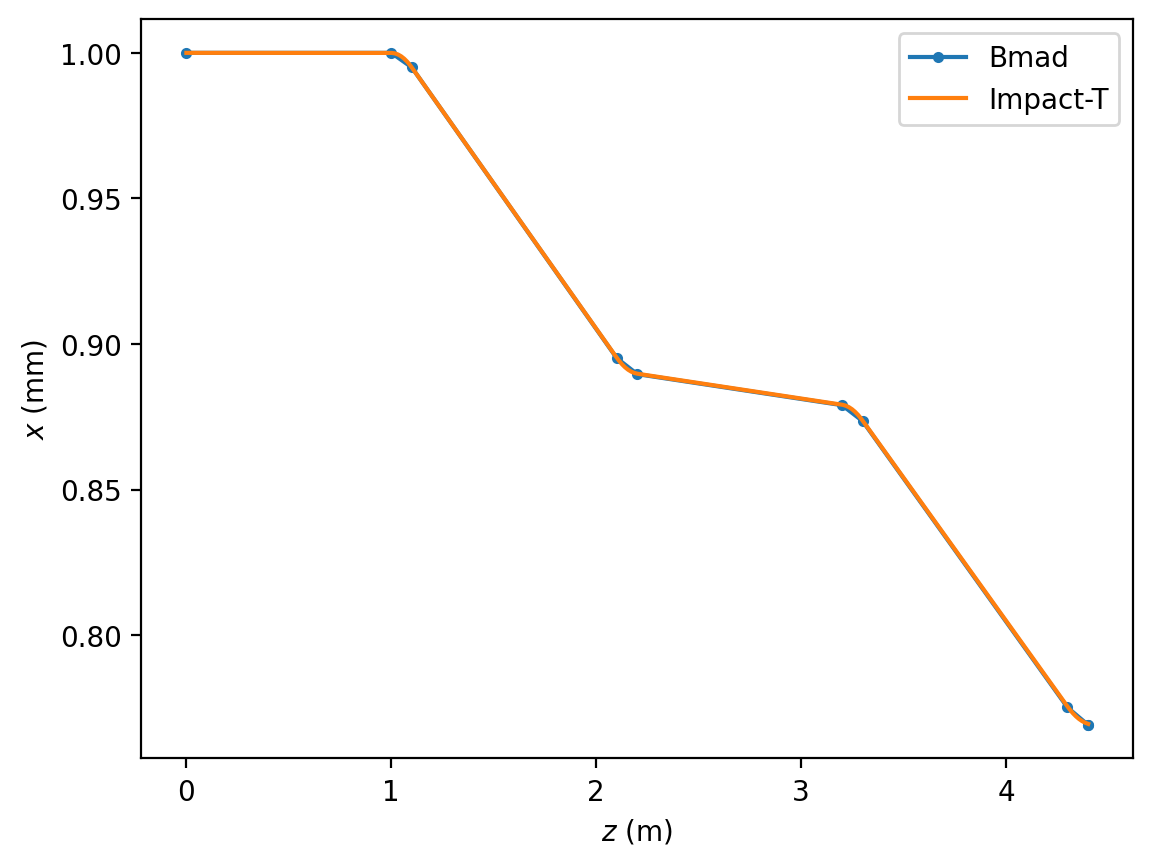

In [6]:
s1 = tao.lat_list('*', 'ele.s')
x1 = tao.lat_list('*', 'orbit.vec.1')

z2 = I.stat('mean_z')
x2 = I.stat('mean_x')

fix, ax = plt.subplots()
ax.plot(s1, x1*1e3, marker='.', label='Bmad')
ax.plot(z2, x2*1e3,  label='Impact-T')
plt.legend()
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'$x$ (mm)')

# Cleanup

In [7]:
import os
os.remove('lat.bmad')